In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\Dell\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# File paths
file_path_jabar = 'dataset//Data_Timbulan_Sampah_SIPSN_KLHK_Jawa Barat.xlsx'
file_path_jatim = 'dataset//Data_Timbulan_Sampah_SIPSN_KLHK_Jawa Timur.xlsx'

# Load data Jawa Barat
df_jabar = pd.read_excel(file_path_jabar, skiprows=1)

# Load data Jawa Timur
df_jatim = pd.read_excel(file_path_jatim, skiprows=1)

# Menghitung total timbulan sampah tahunan untuk masing-masing provinsi
df = pd.concat([df_jabar, df_jatim])

print(df.head())

   Tahun    Provinsi Kabupaten/Kota  Timbulan Sampah Harian(ton)  \
0   2023  Jawa Barat     Kab. Garut                      1121.82   
1   2023  Jawa Barat    Kab. Ciamis                       499.11   
2   2023  Jawa Barat  Kab. Sumedang                       478.92   
3   2023  Jawa Barat  Kab. Karawang                      1054.13   
4   2023  Jawa Barat    Kab. Bekasi                      2219.00   

   Timbulan Sampah Tahunan(ton)  
0                     409465.37  
1                     182174.42  
2                     174806.09  
3                     384758.32  
4                     809935.00  


## 1

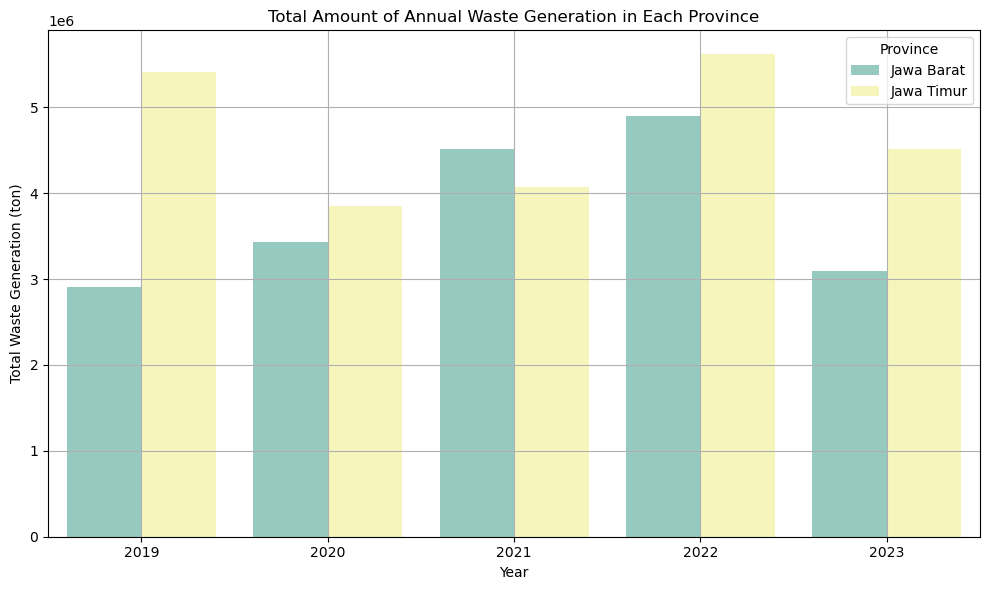

In [4]:
# Grouping by province and year to calculate average total waste generation
grouped = df.groupby(["Tahun", "Provinsi"])["Timbulan Sampah Tahunan(ton)"].sum().reset_index()

# Using seaborn for a colorful bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x="Tahun", y="Timbulan Sampah Tahunan(ton)", hue="Provinsi", data=grouped, palette="Set3")

plt.title('Total Amount of Annual Waste Generation in Each Province')
plt.xlabel('Year')
plt.ylabel('Total Waste Generation (ton)')
plt.legend(title='Province', loc='upper right')
plt.grid(True)
plt.tight_layout()

# Showing the plot
plt.show()

## 2

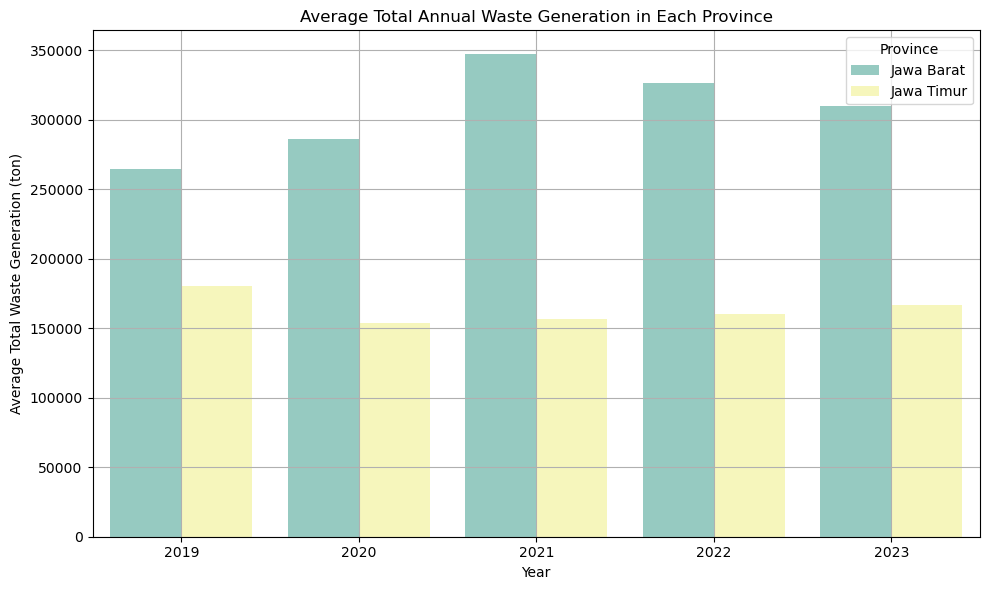

In [5]:
# Grouping by province and year to calculate average total waste generation
grouped = df.groupby(["Tahun", "Provinsi"])["Timbulan Sampah Tahunan(ton)"].mean().reset_index()

# Using seaborn for a colorful bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x="Tahun", y="Timbulan Sampah Tahunan(ton)", hue="Provinsi", data=grouped, palette="Set3")

plt.title('Average Total Annual Waste Generation in Each Province')
plt.xlabel('Year')
plt.ylabel('Average Total Waste Generation (ton)')
plt.legend(title='Province', loc='upper right')
plt.grid(True)
plt.tight_layout()

# Showing the plot
plt.show()

## 3

In [6]:
df["Tahun"] = pd.to_numeric(df["Tahun"])

# Group by year and province and find the province with maximum waste generation each year
grouped = df.groupby(["Tahun", "Provinsi"])["Timbulan Sampah Tahunan(ton)"].sum().reset_index()

max_producers = grouped.loc[grouped.groupby('Tahun')['Timbulan Sampah Tahunan(ton)'].idxmax()]

print("Province with maximum Timbulan Sampah Tahunan(ton) each year:")
print(max_producers)

Province with maximum Timbulan Sampah Tahunan(ton) each year:
   Tahun    Provinsi  Timbulan Sampah Tahunan(ton)
1   2019  Jawa Timur                    5413713.50
3   2020  Jawa Timur                    3847380.64
4   2021  Jawa Barat                    4510863.43
7   2022  Jawa Timur                    5616863.25
9   2023  Jawa Timur                    4509970.46


## 4

In [7]:
df["Tahun"] = pd.to_numeric(df["Tahun"])

# Group by year and province and find the province with maximum waste generation each year
grouped = df.groupby(["Tahun", "Provinsi"])["Timbulan Sampah Tahunan(ton)"].sum().reset_index()

max_producers = grouped.loc[grouped.groupby('Tahun')['Timbulan Sampah Tahunan(ton)'].idxmin()]

print("Province with maximum Timbulan Sampah Tahunan(ton) each year:")
print(max_producers)

Province with maximum Timbulan Sampah Tahunan(ton) each year:
   Tahun    Provinsi  Timbulan Sampah Tahunan(ton)
0   2019  Jawa Barat                    2907389.89
2   2020  Jawa Barat                    3430859.16
5   2021  Jawa Timur                    4068912.00
6   2022  Jawa Barat                    4894648.33
8   2023  Jawa Barat                    3100437.11


## 5

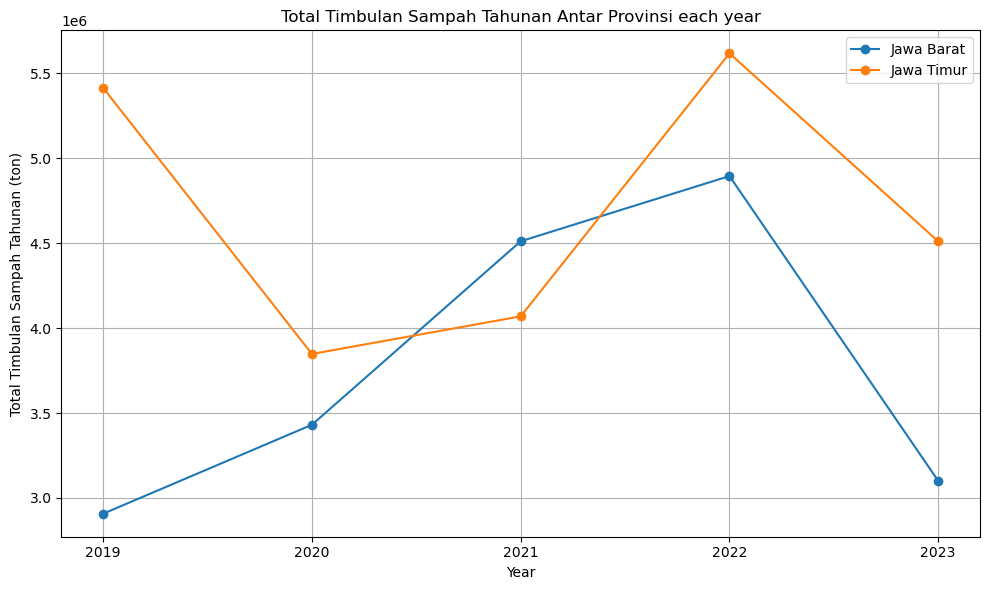

In [8]:
avg_df = df.groupby(["Tahun", "Provinsi"])["Timbulan Sampah Tahunan(ton)"].sum().reset_index()

# Membuat line chart
plt.figure(figsize=(10, 6))
for provinsi in avg_df["Provinsi"].unique():
    subset = avg_df[avg_df["Provinsi"] == provinsi]
    plt.plot(subset["Tahun"], subset["Timbulan Sampah Tahunan(ton)"], marker='o', label=provinsi)

plt.title('Total Timbulan Sampah Tahunan Antar Provinsi each year')
plt.xlabel('Year')
plt.ylabel('Total Timbulan Sampah Tahunan (ton)')
plt.legend()
plt.grid(True)
plt.xticks(subset["Tahun"].unique())
plt.tight_layout()

# Menampilkan plot
plt.show()

## 6

In [9]:
# Menampilkan total timbulan sampah tahunan
total_waste = df.groupby('Provinsi')['Timbulan Sampah Tahunan(ton)'].sum().reset_index()

# Menghitung rata-rata timbulan sampah tahunan untuk masing-masing provinsi
average_waste = df.groupby('Provinsi')['Timbulan Sampah Tahunan(ton)'].mean().reset_index()

# Menambahkan kategori berdasarkan rata-rata timbulan sampah
conditions = [
    (average_waste['Timbulan Sampah Tahunan(ton)'] <= 100000),
    (average_waste['Timbulan Sampah Tahunan(ton)'] > 100000) & (average_waste['Timbulan Sampah Tahunan(ton)'] <= 700000),
    (average_waste['Timbulan Sampah Tahunan(ton)'] > 700000)
]
categories = ['GREEN', 'ORANGE', 'RED']
average_waste['Category'] = pd.cut(average_waste['Timbulan Sampah Tahunan(ton)'], bins=[0, 100000, 700000, float('inf')], labels=categories)

# Menampilkan hasil perhitungan
print(total_waste)
print(average_waste)

     Provinsi  Timbulan Sampah Tahunan(ton)
0  Jawa Barat                   18844197.92
1  Jawa Timur                   23456839.85
     Provinsi  Timbulan Sampah Tahunan(ton) Category
0  Jawa Barat                 308921.277377   ORANGE
1  Jawa Timur                 164033.845105   ORANGE


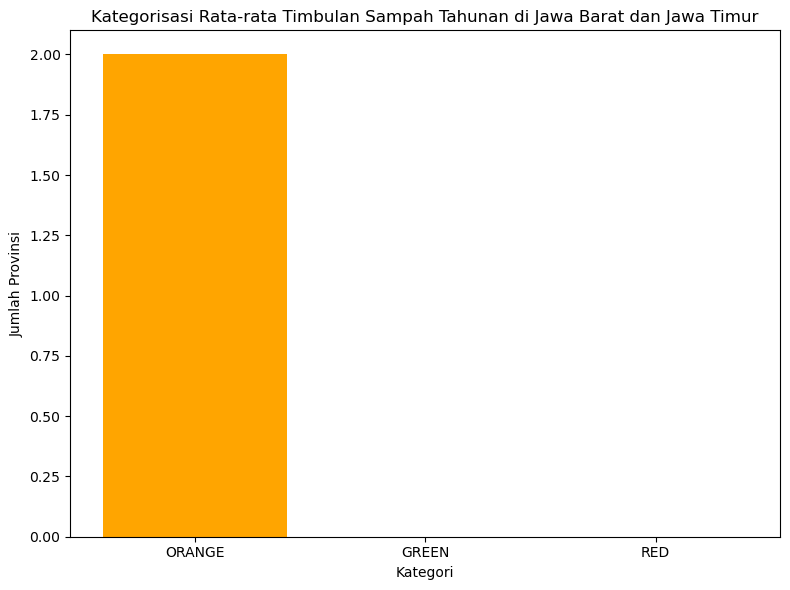

In [10]:
# Visualisasi kategori provinsi berdasarkan rata-rata timbulan sampah
def plot_categorized_provinces(df):
    fig, ax = plt.subplots(figsize=(8, 6))
    colors = {'GREEN': 'green', 'ORANGE': 'orange', 'RED': 'red'}
    categories = df['Category'].value_counts().index
    counts = df['Category'].value_counts().values
    ax.bar(categories, counts, color=[colors[cat] for cat in categories])
    ax.set_xlabel('Kategori')
    ax.set_ylabel('Jumlah Provinsi')
    ax.set_title('Kategorisasi Rata-rata Timbulan Sampah Tahunan di Jawa Barat dan Jawa Timur')
    plt.tight_layout()
    plt.show()

# Memanggil fungsi plot
plot_categorized_provinces(average_waste)